In [1]:

import dlib
import cv2 as cv
from mtcnn.mtcnn import MTCNN
import face_recognition as facer

from tqdm import tqdm
from tqdm import tnrange
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plot


/data/soft/py3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
pNum = "T000001"

proj = "/root/proj/SecurityAI_Round1"
pimg = f"{proj}/Data/images"
pmdl = f"{proj}/Model"
pout = f"{proj}/Out/{pNum}"

In [3]:
# st, ed = 1, 100
st, ed = 1, 712


In [4]:
modelv = "_81"
detector = dlib.get_frontal_face_detector()
%time predictor = dlib.shape_predictor(f"{pmdl}/shape_predictor{modelv}_face_landmarks.dat")


def f_xy(images):
    min_y, max_y, min_x, max_x = 112, 0, 112, 0
    cv_face = detector(cv.cvtColor(images, cv.COLOR_BGR2GRAY), 1)
    if cv_face:
        for face in cv_face:
            shape = predictor(images, face)
            for pt in shape.parts():
                min_y, max_y = min(pt.y, min_y), max(pt.y, max_y)
                min_x, max_x = min(pt.x, min_x), max(pt.x, max_x)
    else:
        min_y, max_y, min_x, max_x = 0, 112, 0, 112
    
    min_y, max_y, min_x, max_x = max(min_y,0), min(max_y,112), max(min_x,0), min(max_x,112)
    return min_y, max_y, min_x, max_x

print(
    f_xy(cv.imread(f"{pimg}/00001.jpg")), 
    f_xy(cv.imread(f"{pimg}/00003.jpg"))
)
%time f_xy(cv.imread(f"{pimg}/00001.jpg"))


CPU times: user 256 ms, sys: 11.9 ms, total: 268 ms
Wall time: 267 ms
(16, 112, 19, 102) (0, 112, 0, 112)
CPU times: user 11 ms, sys: 0 ns, total: 11 ms
Wall time: 10.5 ms


(16, 112, 19, 102)

In [5]:
%time dmtcnn = MTCNN()

def f_xy_mtcnn(images):
    rdetector = dmtcnn.detect_faces(images)
    min_y, max_y, min_x, max_x = 112, 0, 112, 0
    if rdetector:
        x, y, w, h = rdetector[0]["box"]
        min_y, max_y, min_x, max_x = y, y+h, x, x+w
    else:
        min_y, max_y, min_x, max_x = 0, 112, 0, 112
        
    min_y, max_y, min_x, max_x = max(min_y,0), min(max_y,112), max(min_x,0), min(max_x,112)
    return min_y, max_y, min_x, max_x

print(
    f_xy_mtcnn(cv.imread(f"{pimg}/00001.jpg")), 
    f_xy_mtcnn(cv.imread(f"{pimg}/00003.jpg")),
    f_xy_mtcnn(cv.imread(f"{pimg}/00489.jpg"))
)
%time f_xy_mtcnn(cv.imread(f"{pimg}/00001.jpg"))


CPU times: user 200 ms, sys: 16.1 ms, total: 216 ms
Wall time: 208 ms
(17, 112, 14, 99) (14, 111, 2, 80) (0, 112, 0, 112)
CPU times: user 25.1 ms, sys: 1.79 ms, total: 26.9 ms
Wall time: 18.4 ms


(17, 112, 14, 99)

In [6]:

def f_xy_facer(images):
    result = facer.face_landmarks(images)
    min_y, max_y, min_x, max_x = 112, 0, 112, 0
    if result:
        resultl = []
        for ir in result[0].values():
            resultl += ir
        for ir in resultl:
            min_y, max_y = min(ir[1], min_y), max(ir[1], max_y)
            min_x, max_x = min(ir[0], min_x), max(ir[0], max_x)
    else:
        min_y, max_y, min_x, max_x = 0, 112, 0, 112
    
    min_y, max_y, min_x, max_x = max(min_y,0), min(max_y,112), max(min_x,0), min(max_x,112)
    return min_y, max_y, min_x, max_x

print(
    f_xy_facer(cv.imread(f"{pimg}/00001.jpg")), 
    f_xy_facer(cv.imread(f"{pimg}/00003.jpg")),
    f_xy_facer(cv.imread(f"{pimg}/00489.jpg"))
)
%time f_xy_facer(cv.imread(f"{pimg}/00004.jpg"))


(36, 112, 19, 102) (0, 112, 0, 112) (0, 112, 0, 112)
CPU times: user 17.2 ms, sys: 17 µs, total: 17.2 ms
Wall time: 16.9 ms


(38, 112, 0, 86)

In [7]:
def f_lf1(f1, f2):
    return np.sqrt(np.sum(np.square(f1 - f2)))

print("SAME:%.6f" % f_lf1(cv.imread(f"{pimg}/00001.jpg"), cv.imread(f"{pimg}/00001.jpg")))
print("DIFF:%.6f" % f_lf1(cv.imread(f"{pimg}/00001.jpg"), cv.imread(f"{pimg}/00002.jpg")))
print("DIFF:%.6f" % f_lf1(cv.imread(f"{pimg}/00001.jpg"), cv.imread(f"{pimg}/00406.jpg")))

%time f_lf1(cv.imread(f"{pimg}/00001.jpg"), cv.imread(f"{pimg}/00002.jpg"))


SAME:0.000000
DIFF:1974.158302
DIFF:1993.636627
CPU times: user 1.31 ms, sys: 35 µs, total: 1.35 ms
Wall time: 1.3 ms


1974.1583016566833

In [8]:
fx1 = lambda x1, x2, x3: max(x1,x2)
fx2 = lambda x1, x2, x3: min(x1,x2)


7968


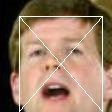

In [9]:
pi = f"{pimg}/"+f"00001.jpg"
op = f"{proj}/Data/Z1.jpg"
img = cv.imread(pi)

min_y, max_y, min_x, max_x = f_xy(img)
print((max_y-min_y)*(max_x-min_x))

cv.line(img, (min_x, min_y), (max_x, max_y), (255, 255, 255))
cv.line(img, (min_x, min_y), (min_x, max_y), (255, 255, 255))
cv.line(img, (min_x, min_y), (max_x, min_y), (255, 255, 255))

cv.line(img, (min_x, max_y), (max_x, max_y), (255, 255, 255))
cv.line(img, (min_x, max_y), (min_x, max_y), (255, 255, 255))
cv.line(img, (min_x, max_y), (max_x, min_y), (255, 255, 255))

cv.line(img, (max_x, min_y), (max_x, max_y), (255, 255, 255))
cv.line(img, (max_x, min_y), (min_x, max_y), (255, 255, 255))
cv.line(img, (max_x, min_y), (max_x, min_y), (255, 255, 255))

cv.line(img, (max_x, max_y), (max_x, max_y), (255, 255, 255))
cv.line(img, (max_x, max_y), (min_x, max_y), (255, 255, 255))
cv.line(img, (max_x, max_y), (max_x, min_y), (255, 255, 255))

cv.imwrite(op, img)
Image(filename=op, width=300, height=300)

8075


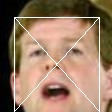

In [10]:
pi = f"{pimg}/"+f"00001.jpg"
op = f"{proj}/Data/Z1.jpg"
img = cv.imread(pi)

min_y, max_y, min_x, max_x = f_xy_mtcnn(img)
print((max_y-min_y)*(max_x-min_x))

cv.line(img, (min_x, min_y), (max_x, max_y), (255, 255, 255))
cv.line(img, (min_x, min_y), (min_x, max_y), (255, 255, 255))
cv.line(img, (min_x, min_y), (max_x, min_y), (255, 255, 255))

cv.line(img, (min_x, max_y), (max_x, max_y), (255, 255, 255))
cv.line(img, (min_x, max_y), (min_x, max_y), (255, 255, 255))
cv.line(img, (min_x, max_y), (max_x, min_y), (255, 255, 255))

cv.line(img, (max_x, min_y), (max_x, max_y), (255, 255, 255))
cv.line(img, (max_x, min_y), (min_x, max_y), (255, 255, 255))
cv.line(img, (max_x, min_y), (max_x, min_y), (255, 255, 255))

cv.line(img, (max_x, max_y), (max_x, max_y), (255, 255, 255))
cv.line(img, (max_x, max_y), (min_x, max_y), (255, 255, 255))
cv.line(img, (max_x, max_y), (max_x, min_y), (255, 255, 255))

cv.imwrite(op, img)
Image(filename=op, width=300, height=300)

6308


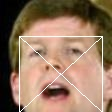

In [11]:
pi = f"{pimg}/"+f"00001.jpg"
op = f"{proj}/Data/Z1.jpg"
img = cv.imread(pi)

min_y, max_y, min_x, max_x = f_xy_facer(img)
print((max_y-min_y)*(max_x-min_x))

cv.line(img, (min_x, min_y), (max_x, max_y), (255, 255, 255))
cv.line(img, (min_x, min_y), (min_x, max_y), (255, 255, 255))
cv.line(img, (min_x, min_y), (max_x, min_y), (255, 255, 255))

cv.line(img, (min_x, max_y), (max_x, max_y), (255, 255, 255))
cv.line(img, (min_x, max_y), (min_x, max_y), (255, 255, 255))
cv.line(img, (min_x, max_y), (max_x, min_y), (255, 255, 255))

cv.line(img, (max_x, min_y), (max_x, max_y), (255, 255, 255))
cv.line(img, (max_x, min_y), (min_x, max_y), (255, 255, 255))
cv.line(img, (max_x, min_y), (max_x, min_y), (255, 255, 255))

cv.line(img, (max_x, max_y), (max_x, max_y), (255, 255, 255))
cv.line(img, (max_x, max_y), (min_x, max_y), (255, 255, 255))
cv.line(img, (max_x, max_y), (max_x, min_y), (255, 255, 255))

cv.imwrite(op, img)
Image(filename=op, width=300, height=300)

7600


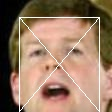

In [12]:
pi = f"{pimg}/"+f"00001.jpg"
op = f"{proj}/Data/Z1.jpg"
img = cv.imread(pi)

min_y1, max_y1, min_x1, max_x1 = f_xy(img)
min_y2, max_y2, min_x2, max_x2 = f_xy_mtcnn(img)
min_y3, max_y3, min_x3, max_x3 = f_xy_facer(img)

min_yl, max_yl = fx1(min_y1,min_y2,min_y3), fx2(max_y1,max_y2,max_y3)
min_xl, max_xl = fx1(min_x1,min_x2,min_x3), fx2(max_x1,max_x2,max_x3)

min_y, max_y, min_x, max_x = min_yl, max_yl, min_xl, max_xl
print((max_y-min_y)*(max_x-min_x))

cv.line(img, (min_x, min_y), (max_x, max_y), (255, 255, 255))
cv.line(img, (min_x, min_y), (min_x, max_y), (255, 255, 255))
cv.line(img, (min_x, min_y), (max_x, min_y), (255, 255, 255))

cv.line(img, (min_x, max_y), (max_x, max_y), (255, 255, 255))
cv.line(img, (min_x, max_y), (min_x, max_y), (255, 255, 255))
cv.line(img, (min_x, max_y), (max_x, min_y), (255, 255, 255))

cv.line(img, (max_x, min_y), (max_x, max_y), (255, 255, 255))
cv.line(img, (max_x, min_y), (min_x, max_y), (255, 255, 255))
cv.line(img, (max_x, min_y), (max_x, min_y), (255, 255, 255))

cv.line(img, (max_x, max_y), (max_x, max_y), (255, 255, 255))
cv.line(img, (max_x, max_y), (min_x, max_y), (255, 255, 255))
cv.line(img, (max_x, max_y), (max_x, min_y), (255, 255, 255))

cv.imwrite(op, img)
Image(filename=op, width=300, height=300)

In [13]:
def min_max_x_y(images):
    min_y1, max_y1, min_x1, max_x1 = f_xy(images)
    min_y2, max_y2, min_x2, max_x2 = f_xy_mtcnn(images)
    min_y3, max_y3, min_x3, max_x3 = f_xy_facer(images)
    
    min_y, max_y = fx1(min_y1,min_y2,min_y3), fx2(max_y1,max_y2,max_y3)
    min_x, max_x = fx1(min_x1,min_x2,min_x3), fx2(max_x1,max_x2,max_x3)
    return min_y, max_y, min_x, max_x


def frun(tpath, time):
    d = 25.5
    
    for i in tnrange(st, ed+1, desc=f"S{time+1}"):
        pi = f"{pimg}/"+f"00000{i}"[-5:]+".jpg"
        op = f"{pout}/images/"+f"00000{i}"[-5:]+".jpg"

        img = cv.imread(pi)
        imgj, min_p012 = 1, 99999.0
                
        min_yl, max_yl, min_xl, max_xl = min_max_x_y(img)
        
        for imgi in range(st, ed+1, 1):
            imgx = cv.imread(tpath+f"00000{imgi}"[-5:]+".jpg")
            
            if not isinstance(imgx, type(None)):
                p012 = f_lf1(
                    img[min_yl:max_yl, min_xl:max_xl],
                    np.clip(
                        imgx[min_yl:max_yl, min_xl:max_xl], 
                        img[min_yl:max_yl, min_xl:max_xl]-d, 
                        img[min_yl:max_yl, min_xl:max_xl]+d
                    )
                )
                
                if p012 < min_p012 and imgi != i:
                    imgj, min_p012 = imgi, p012

        print(f"{i},{imgj}, Avg:{min_p012:.{6}}", min_yl, max_yl, min_yl, max_yl)
        
        img_o = img.copy()
        img_g = cv.imread(tpath+f"00000{imgj}"[-5:]+".jpg")
    
        img_o[min_yl:max_yl, min_xl:max_xl] = img_g[min_yl:max_yl, min_xl:max_xl]
        img_o = np.clip(img_o, img-d, img+d)        
        cv.imwrite(op, img_o)
        
        for _ in range(1000):
            img_o = img.copy()
            img_g = cv.imread(op)
            rxy = min_max_x_y(img_g)
            
            if (min_yl, max_yl, min_xl, max_xl) == rxy:
                break

            min_yl, max_yl, min_xl, max_xl = rxy
            img_o[min_yl:max_yl, min_xl:max_xl] = img_g[min_yl:max_yl, min_xl:max_xl]     
            cv.imwrite(op, img_o)

frun(tpath=f"{pimg}/", time=0)



1,401, Avg:2899.48 17 112 17 112
2,233, Avg:2998.49 20 112 20 112
3,116, Avg:3165.99 14 111 14 111
4,368, Avg:3014.74 11 112 11 112
5,111, Avg:2787.58 17 109 17 109
6,245, Avg:2742.48 13 112 13 112
7,655, Avg:3294.53 11 111 11 111
8,123, Avg:2708.26 13 109 13 109
9,704, Avg:2685.8 17 112 17 112
10,219, Avg:2350.63 29 109 29 109
11,161, Avg:2779.5 15 111 15 111
12,224, Avg:3222.16 21 112 21 112
13,112, Avg:2681.65 20 112 20 112
14,523, Avg:2665.06 15 112 15 112
15,449, Avg:2803.11 13 112 13 112
16,196, Avg:2709.17 14 112 14 112
17,278, Avg:2671.56 17 112 17 112
18,229, Avg:2810.07 10 111 10 111
19,233, Avg:3053.94 14 112 14 112
20,155, Avg:2849.2 16 112 16 112
21,711, Avg:2671.61 20 112 20 112
22,65, Avg:3019.45 16 109 16 109
23,386, Avg:2634.9 22 111 22 111
24,155, Avg:2702.35 19 112 19 112
25,645, Avg:2748.34 17 110 17 110
26,328, Avg:2871.56 16 109 16 109
27,608, Avg:2671.18 18 112 18 112
28,453, Avg:2945.71 17 112 17 112
29,318, Avg:2954.91 15 112 15 112
30,572, Avg:2779.29 14 112 1

240,112, Avg:2866.74 18 112 18 112
241,104, Avg:2538.86 15 112 15 112
242,182, Avg:2692.25 17 112 17 112
243,253, Avg:2749.32 16 108 16 108
244,278, Avg:2587.5 16 112 16 112
245,6, Avg:2600.98 14 112 14 112
246,632, Avg:3113.38 18 112 18 112
247,280, Avg:3117.88 10 112 10 112
248,222, Avg:2755.85 17 109 17 109
249,571, Avg:2632.88 12 112 12 112
250,712, Avg:2864.53 11 112 11 112
251,39, Avg:2713.99 17 112 17 112
252,289, Avg:2710.31 19 112 19 112
253,332, Avg:2489.73 17 111 17 111
254,653, Avg:2722.35 16 110 16 110
255,93, Avg:2593.91 17 112 17 112
256,237, Avg:2948.31 16 112 16 112
257,155, Avg:3000.19 24 112 24 112
258,613, Avg:2847.34 17 103 17 103
259,625, Avg:2869.98 19 112 19 112
260,93, Avg:2693.99 14 112 14 112
261,72, Avg:2662.58 10 109 10 109
262,21, Avg:2736.25 16 112 16 112
263,278, Avg:2844.97 15 111 15 111
264,704, Avg:2518.55 16 111 16 111
265,624, Avg:2859.67 21 112 21 112
266,685, Avg:2919.95 17 111 17 111
267,25, Avg:2999.9 17 112 17 112
268,613, Avg:2855.43 17 110 17

476,205, Avg:2947.76 18 112 18 112
477,229, Avg:2642.21 18 112 18 112
478,168, Avg:2529.06 15 112 15 112
479,608, Avg:2949.63 12 111 12 111
480,613, Avg:2759.07 14 112 14 112
481,222, Avg:2530.3 11 110 11 110
482,149, Avg:2394.13 20 108 20 108
483,282, Avg:2649.37 13 112 13 112
484,429, Avg:2584.32 14 112 14 112
485,518, Avg:2983.53 19 112 19 112
486,443, Avg:2631.18 16 112 16 112
487,167, Avg:2648.97 16 112 16 112
488,358, Avg:2649.76 16 112 16 112
489,244, Avg:4151.33 0 112 0 112
490,307, Avg:2600.52 15 111 15 111
491,116, Avg:2999.99 15 112 15 112
492,647, Avg:2813.41 21 112 21 112
493,43, Avg:3042.08 14 112 14 112
494,229, Avg:2502.91 17 112 17 112
495,305, Avg:2610.45 18 112 18 112
496,109, Avg:2573.31 17 112 17 112
497,109, Avg:2459.1 17 112 17 112
498,331, Avg:3127.97 20 112 20 112
499,521, Avg:3016.36 13 112 13 112
500,434, Avg:2835.04 15 112 15 112
501,512, Avg:2735.63 20 112 20 112
502,596, Avg:2790.23 14 110 14 110
503,345, Avg:2975.08 13 112 13 112
504,168, Avg:2608.03 16 1

712,141, Avg:2611.31 16 111 16 111



In [14]:
! sh run.sh

.....
  adding: images/ (stored 0%)
  adding: images/00383.jpg (deflated 4%)
  adding: images/00037.jpg (deflated 4%)
  adding: images/00639.jpg (deflated 4%)
  adding: images/00362.jpg (deflated 4%)
  adding: images/00650.jpg (deflated 4%)
  adding: images/00235.jpg (deflated 4%)
  adding: images/00625.jpg (deflated 4%)
  adding: images/00670.jpg (deflated 4%)
  adding: images/00344.jpg (deflated 4%)
  adding: images/00301.jpg (deflated 4%)
  adding: images/00584.jpg (deflated 4%)
  adding: images/00378.jpg (deflated 4%)
  adding: images/00496.jpg (deflated 4%)
  adding: images/00138.jpg (deflated 4%)
  adding: images/00232.jpg (deflated 4%)
  adding: images/00236.jpg (deflated 4%)
  adding: images/00679.jpg (deflated 4%)
  adding: images/00260.jpg (deflated 4%)
  adding: images/00687.jpg (deflated 4%)
  adding: images/00456.jpg (deflated 4%)
  adding: images/00619.jpg (deflated 4%)
  adding: images/00382.jpg (deflated 4%)
  adding: images/00095.jpg (deflated 4%)
  adding: images/0035

  adding: images/00056.jpg (deflated 4%)
  adding: images/00392.jpg (deflated 4%)
  adding: images/00376.jpg (deflated 3%)
  adding: images/00045.jpg (deflated 4%)
  adding: images/00593.jpg (deflated 4%)
  adding: images/00341.jpg (deflated 4%)
  adding: images/00682.jpg (deflated 4%)
  adding: images/00458.jpg (deflated 4%)
  adding: images/00070.jpg (deflated 4%)
  adding: images/00510.jpg (deflated 4%)
  adding: images/00238.jpg (deflated 4%)
  adding: images/00699.jpg (deflated 4%)
  adding: images/00548.jpg (deflated 4%)
  adding: images/00114.jpg (deflated 4%)
  adding: images/00390.jpg (deflated 4%)
  adding: images/00306.jpg (deflated 4%)
  adding: images/00166.jpg (deflated 4%)
  adding: images/00689.jpg (deflated 4%)
  adding: images/00531.jpg (deflated 4%)
  adding: images/00641.jpg (deflated 4%)
  adding: images/00537.jpg (deflated 3%)
  adding: images/00205.jpg (deflated 4%)
  adding: images/00020.jpg (deflated 4%)
  adding: images/00691.jpg (deflated 4%)
  adding: images

  adding: images/00026.jpg (deflated 3%)
  adding: images/00066.jpg (deflated 4%)
  adding: images/00144.jpg (deflated 4%)
  adding: images/00437.jpg (deflated 4%)
  adding: images/00630.jpg (deflated 4%)
  adding: images/00088.jpg (deflated 4%)
  adding: images/00264.jpg (deflated 4%)
  adding: images/00015.jpg (deflated 4%)
  adding: images/00428.jpg (deflated 4%)
  adding: images/00067.jpg (deflated 4%)
  adding: images/00692.jpg (deflated 3%)
  adding: images/00322.jpg (deflated 3%)
  adding: images/00573.jpg (deflated 4%)
  adding: images/00320.jpg (deflated 4%)
  adding: images/00074.jpg (deflated 4%)
  adding: images/00613.jpg (deflated 4%)
  adding: images/00490.jpg (deflated 4%)
  adding: images/00380.jpg (deflated 4%)
  adding: images/00583.jpg (deflated 4%)
  adding: images/00631.jpg (deflated 4%)
  adding: images/00473.jpg (deflated 4%)
  adding: images/00312.jpg (deflated 4%)
  adding: images/00657.jpg (deflated 4%)
  adding: images/00293.jpg (deflated 4%)
  adding: images

In [15]:
#         img_o[min_yl:max_yl, min_xl:max_xl] = cv.bitwise_and(
#             img_o[min_yl:max_yl, min_xl:max_xl], 
#             img_g[min_yl:max_yl, min_xl:max_xl]
#         )

# cv.bitwise_and()-44.0921, cv.bitwise_not()-44.0447
# cv.bitwise_or()-44.1278, cv.bitwise_xor()-43.4221


In [16]:
#
# /data/soft/py3/bin/jupyter

# 
# cosin相似度（余弦相似度）
# https://blog.csdn.net/weixin_39121325/article/details/84187453

#
# dlib model 81
# https://blog.csdn.net/weixin_41010198/article/details/88827209

#
# shape_predictor_81_face_landmarks
# https://github.com/codeniko/shape_predictor_81_face_landmarks

# 
# https://pan.baidu.com/s/100hXZAxtRlE_Z2nDDzHtIQ
# https://segmentfault.com/a/1190000015917420

#
# https://developer.51cto.com/art/201811/587696.htm
# https://github.com/ageitgey/face_recognition
# https://github.com/ageitgey/face_recognition/blob/master/README_Simplified_Chinese.md
 


In [17]:
# ! /data/soft/py3/bin/pip install face_recognition